# Starting out with Python and notebooks


## Cell types

There are two basic cell types in notebooks
1. Markdown cells
2. Code cells

### Markdown Cells

- Good for writing. Can use standard "Markdown" formatting
- Can use "LaTeX" formatting for equations

For example. Here is an equation inline: $F = ma$. And, here's an equation in display form:

$$ E = \frac{V^2}{2g}+y $$

You can also use standard LaTex "equation environment" in:


\begin{equation}
P_1+\frac{1}{2}\rho v_1^2 + \rho g h_1= P_2+\frac{1}{2}\rho v_1^2 + \rho g h_2
\end{equation}

### Code Cells

"Code" cell block are where the computations are actually performed. Before we get going with code, we'll need to load a few libraries.

## Loading libraries

Try executing the following blocks of code (press the play button to the side or use the hotkey command ```shift+enter```):

In [ ]:
5+5

10

In [ ]:
pi

NameError: name 'pi' is not defined

In [ ]:
sin(5)

NameError: name 'sin' is not defined

As you can see, ```pi``` or ```sin``` are not available for use in standard base Python. That is, ```pi``` and ```sin``` don't necessarily mean anything on their own. They are just letters that you might use to define a variable.

To use them as mathematical operators you need to import libraries where these are specifically defined operations and values. The most common library for most scientific calculations is called [NumPy](https://numpy.org/). We need to load this to get access to common mathematical operations and other backbone components of scientific computing.

There are different ways to load NumPy and other libraries to gain access. Here are some examples:

### Method 1a

In [ ]:
import numpy as np

# now we can try taking the sin of pi by using np to refer to the numpy library and .pi and .sin as
# the attributes of numpy called pi and sin

np.sin(np.pi)

1.2246467991473532e-16

### Method 1b
Here we load all of numpy as np, but then add some stuff directly so that we don't need the np.*

In [2]:
import numpy as np
from numpy import pi, sin

#it may be helpful to import specific references if they're used frequently

sin(pi)

1.2246467991473532e-16

## Variables and foundational types of data

### Variables

Variables are short hand names for different types of data that we can refer to

In [ ]:
var = 8

### Strings

In [ ]:
var2 = 'Hello world'

var2

'Hello world'

### Floats and integers

what if ```var = 1```?

In [ ]:
var = 1

var

1

Now try ```var = 1.5```

In [ ]:
var = 1.5

var

1.5

What happens when ```var = 1.```?

In [ ]:
var = 1.

print(var)

1.0


## Commenting

Notice what the ```#``` mark does in a code block

In [ ]:
2*var

2.0

In [ ]:
# 2*var

You can toggle a line of code off any on by placing or removing ```#``` in front of the code. You can also use hotkeys to comment/uncomment. On windows, the hotkey is ```ctrl+/```

## Arrays

Arrays are very generic containers for numbers and strings. You can think of an array as a row or column from a spreadsheet (1D), the rows and columns of a spreadsheet (2D), or any number of multidimentional object with arrays within arrays within arrays. Arrays provide the backbone for most scientific operations. Below we will work with a basic one dimensional arrays. For more on Numpy arrays see - [A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/)

In [4]:
# 100 pt array that ranges from 0 to 10*pi in even increments (float)

import numpy as np
from numpy import linspace

x = linspace(0, 10*np.pi, 100)

# 100 pt array of integers ranging from 0 to 100-1
xint = np.arange(100)

print(xint)

#check the length of the array to check
len(xint)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


100

In [ ]:
# returns the x values from spots 0, 1, 2 in the array
x[:3]

array([0.        , 0.31733259, 0.63466518])

In [5]:
# create y1 as being the sin of x
y1 = np.sin(x)

# create y2 as y1 * xint
y2 = y1*xint

# create y3 as x^2
y3 = x**2

## Plotting

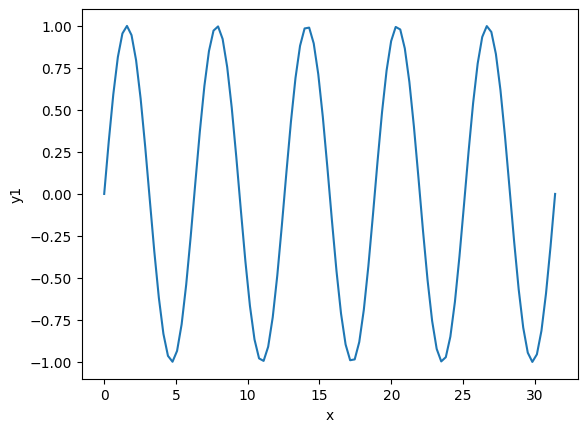

In [8]:
# plot y1 vs x

import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(x, y1)
ax.set_xlabel('x')
ax.set_ylabel('y1')

plt.show()

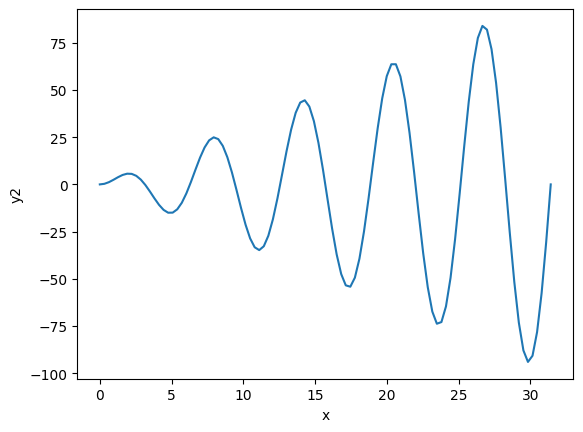

In [10]:
# plot y2 vs x

fig,ax = plt.subplots()
ax.plot(x, y2)
ax.set_xlabel('x')
ax.set_ylabel('y2')

plt.show()

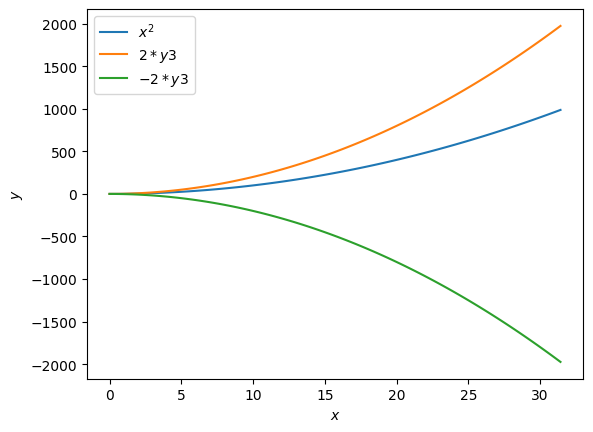

In [9]:
# plot several lines on the same figure

# plot x vs y3, x vs 2*y3, x vs -2*y3

fig,ax = plt.subplots()
ax.plot(x, y3, label = '$x^2$')
ax.plot(x, 2*y3, label = '$2*y3$')
ax.plot(x, -2*y3, label = '$-2*y3$')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend()

plt.show()

## Define a function

Function are nice ways to make

Let's define a very simple function for calculating the volume flow rate of water in a river. The volume flow rate tells you the volume of water flowing past a particular point in the river every second; e.g., 500 cubic feet per second. We typically refer to this important quantity with the variable, $Q$. One way in which we can define $Q$ is as the product of the average velocity of water in the river (how fast it's moving) multiplied by the cross sectional flow area (the area of water made by a 2D plane that intersection the bottom of the river at a perpendicular angle through which the water is flowing):

$$\text{Discharge = Velocity}~ x~ \text{Area} $$

or

$$ Q = VA$$

Now let's define a function that will give us $Q$ if we give it $A$ and $V$.

In [ ]:
def discharge(A,V):
    return V*A

# now use the function
area = 24.3 #ft^2
velocity = 2.69 #ft/s


print('Discharge of the river =',discharge(area, velocity), '[cfs]')

Discharge of the river = 65.367 [cfs]


## Solving an implicit equation: Normal Depth

We will use a defined function + ```fsolve``` to solve for normal depth in a trapezoidal channel:


$$ Q = \frac{k}{n}AR^\frac{2}{3}\sqrt{S} $$

where $$A = (b+my)y $$

$$P = b + 2y\sqrt{1 + m^2} $$

$$R = \frac{A}{P}$$

Goal: solve for the depth, $y$, given the flow characteristics and geometry of the bed.

Since the equation cannote be solved explicitly for $y$, We will use the ```fsolve``` function in scipy: ```f_solution = fsolve(defname,guess, args=(list))```


In [ ]:
#define the function by setting the formula equal to zero

def normal_depth(y, k, Q, n, b, m, S):
    A = (b+(m*y))*y
    P = b + 2*y*np.sqrt(1 + m**2)
    R = A/P
    return (k/n)*A*R**(2/3)*np.sqrt(S) - Q

In [ ]:
from scipy.optimize import fsolve

k = 1.49          #customary units coefficient
Q =1200                 #cfs
n = 0.04            #manning's roughness
b = 50               #cross sectional bottom width
m = 2              #cross sectional side slope ft/ft
S = 0.0003        #channel slope ft/ft

# need a guess value for y

yguess = 5

# now use fsolve to find the y

normal_y = fsolve(normal_depth,yguess, args=(k, Q, n, b, m, S))

# print the solution

print('The normal depth is =', normal_y)
print('The normal depth is =', np.around(normal_y,decimals=3), "[ft]")

The normal depth is = [8.21517096]
The normal depth is = [8.215] [ft]


# Practical Example: Data analysis and visualization for USGS stream data

Another useful way to manipulate data is through dataframes. Dataframes have additional features that make them convenient to use, especially for data that would typically be found in an Excel spreadsheet.

Additionally, we will be using the ```dataretrieval``` package from USGS to directly obtain streamflow data. More info on this package and its functionalities can be found [here](https://doi-usgs.github.io/dataretrieval-python/index.html) and [here](https://www.hydroshare.org/resource/c97c32ecf59b4dff90ef013030c54264/)

In [ ]:
bwinter

In [ ]:
#google colab includes a lot of preinstalled packages (Numpy, matplotlib, etc.)
#but those that aren't can be installed (and typically only need to be installed once)

!pip install dataretrieval